<a href="https://colab.research.google.com/github/ai-competition36/linear-regression/blob/master/classification_%EC%97%B0%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 610 bytes/s 
     |████████████████████████████████| 22.1 MB 1.3 MB/s 
     |████████████████████████████████| 17.4 MB 121 kB/s 
     |████████████████████████████████| 17.3 MB 24 kB/s 
     |████████████████████████████████| 12.8 MB 23 kB/s 
     |████████████████████████████████| 12.7 MB 87 kB/s 
     |████████████████████████████████| 11.8 MB 136 kB/s 
     |████████████████████████████████| 5.9 MB 17.1 MB/s 
     |████████████████████████████████| 6.6 MB 12.0 MB/s 
     |████████████████████████████████| 6.6 MB 21.3 MB/s 
     |████████████████████████████████| 4.0 MB 72.0 MB/s 
     |████████████████████████████████| 10.2 MB 15.3 MB/s 
     |████████████████████████████████| 10.1 MB 55.6 MB/s 
     |████████████████████████████████| 8.8 MB 20.6 MB/s 
     |████████████████████████████████| 2.6 MB 33.7 MB/s 
     |████████████████████████████████| 64 kB 2.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account a

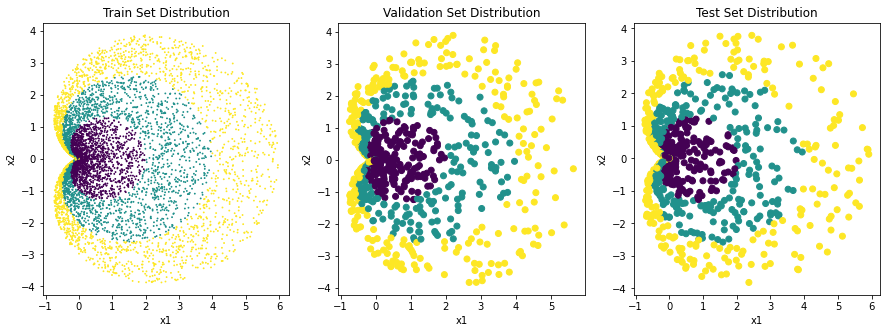

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

r=np.random.rand(10000)*3
theta=np.random.rand(10000)*2*np.pi
y=r.astype(int)
r=r*(np.cos(theta)+1)
x1=r*np.cos(theta)
x2=r*np.sin(theta)
X=np.array([x1,x2]).T

train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')


ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

In [ ]:
import torch
import torch.nn as nn


class LinearModel(nn.Module):
    def __init__(self): 
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)
    
    def forward(self, x):
        x = self.linear(x)
        return x

    
class MLPModel(nn.Module):
    def __init__(self): 
        super(MLPModel, self).__init__()
        self.linear1 = nn.Linear(in_features=2, out_features=200)
        self.linear2 = nn.Linear(in_features=200, out_features=3)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

1203 parameters


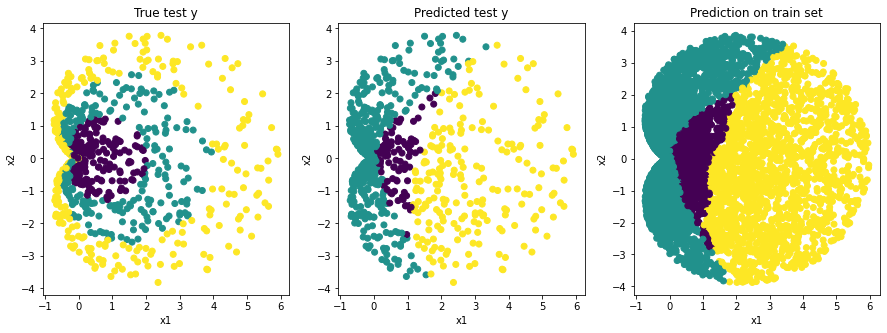

Epoch:  0 Accuracy:  41.5 %


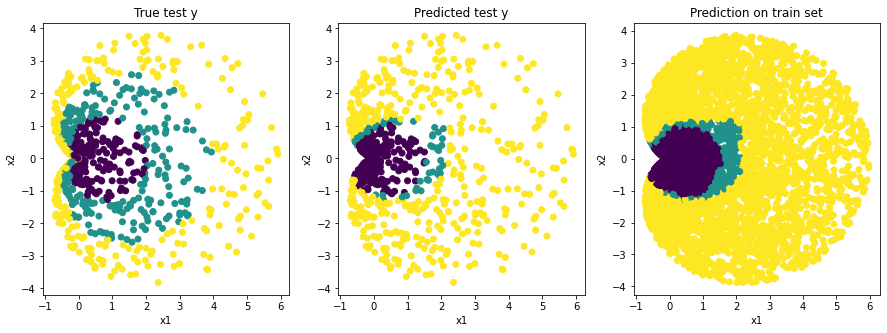

Epoch:  200 Accuracy:  54.800000000000004 %


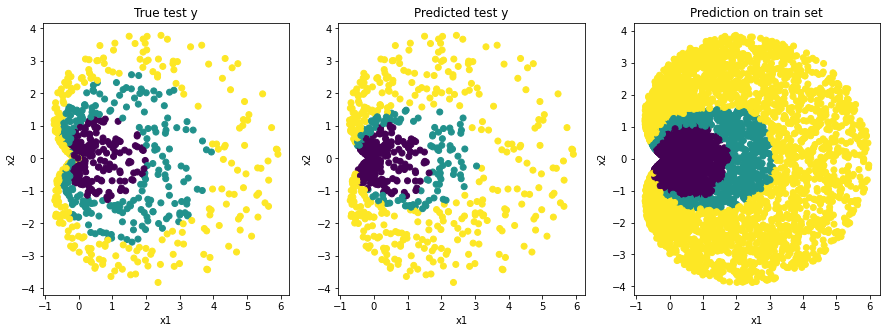

Epoch:  400 Accuracy:  62.6 %


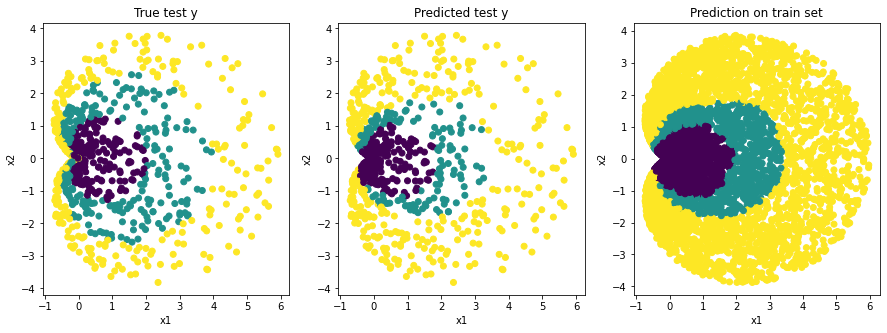

Epoch:  600 Accuracy:  66.10000000000001 %


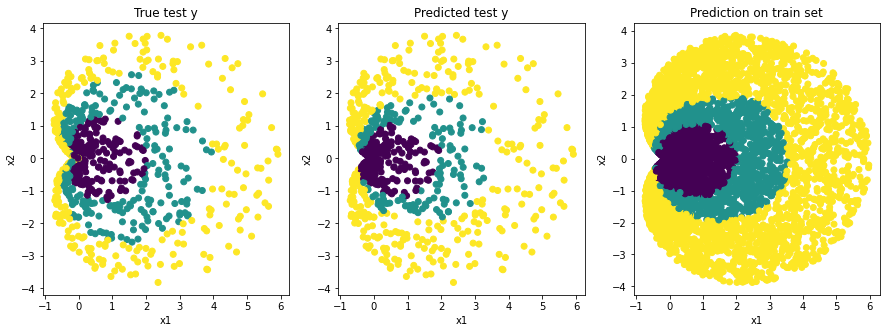

Epoch:  800 Accuracy:  68.10000000000001 %


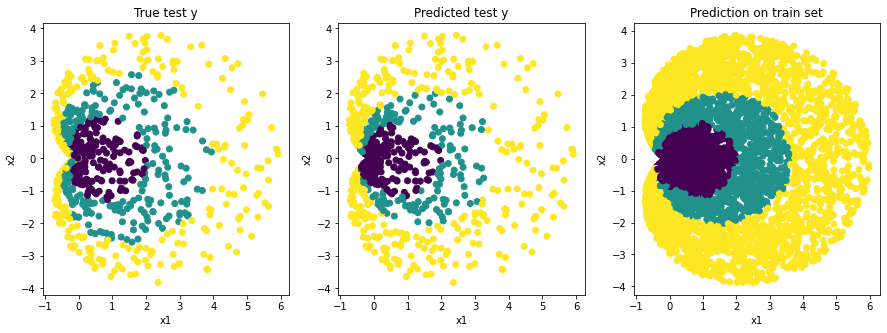

Epoch:  1000 Accuracy:  69.69999999999999 %


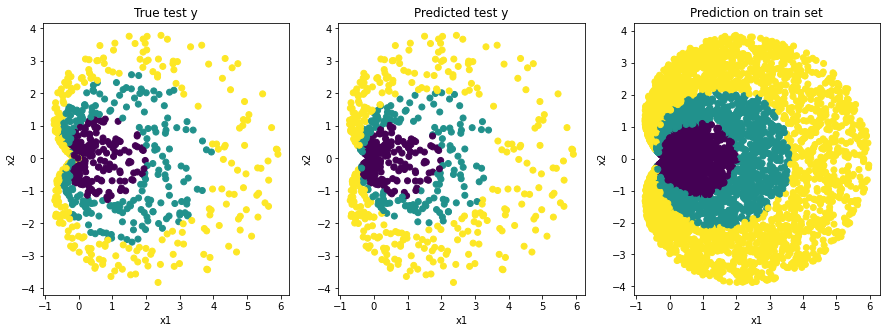

Epoch:  1200 Accuracy:  70.0 %


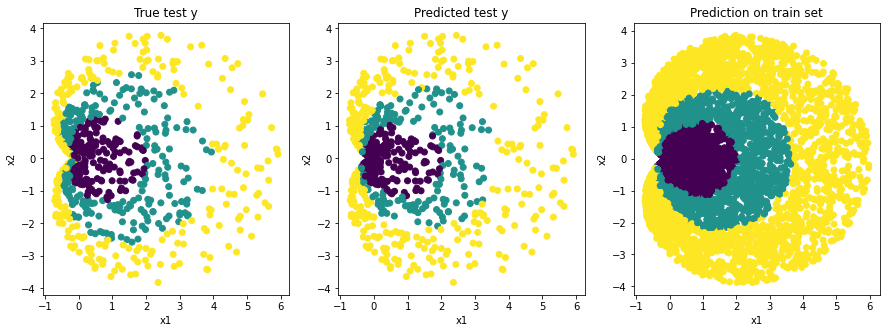

Epoch:  1400 Accuracy:  71.8 %


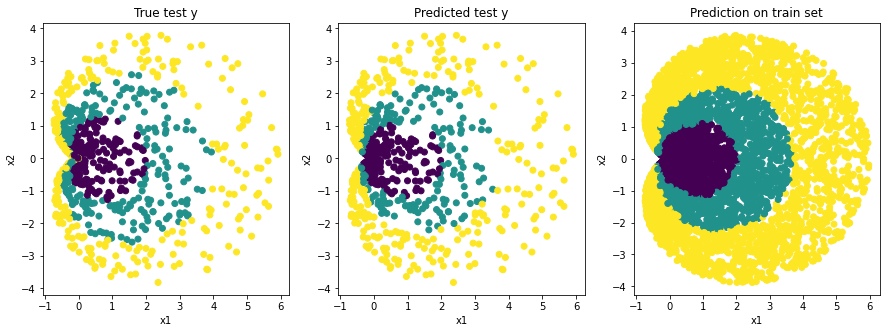

Epoch:  1600 Accuracy:  72.8 %


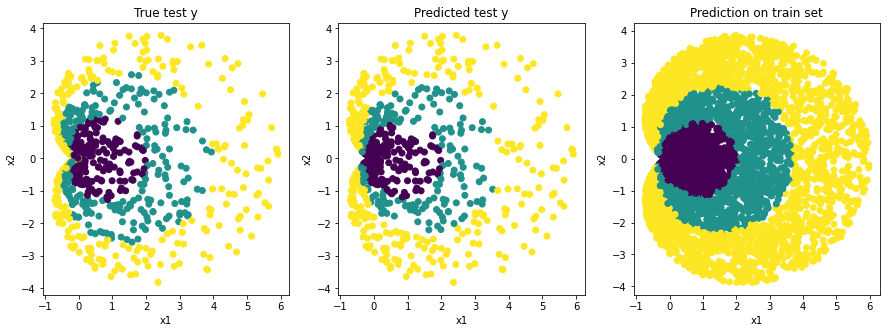

Epoch:  1800 Accuracy:  73.5 %


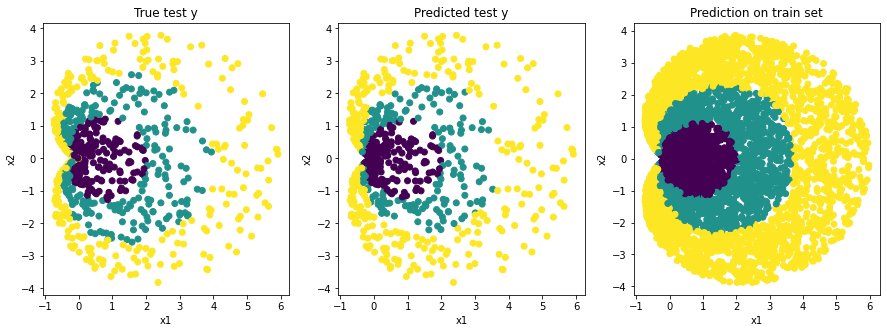

Epoch:  2000 Accuracy:  74.4 %


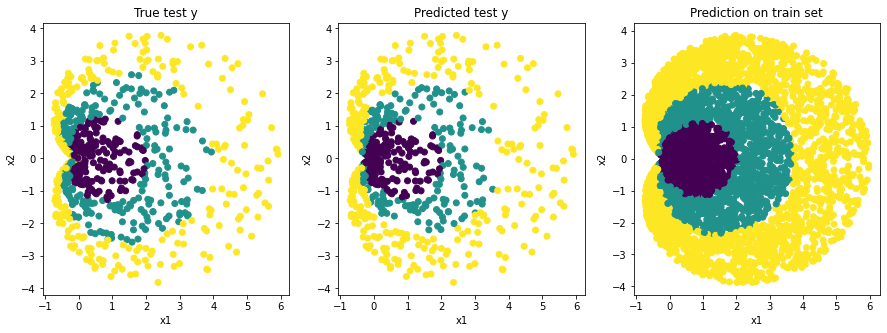

Epoch:  2200 Accuracy:  74.8 %


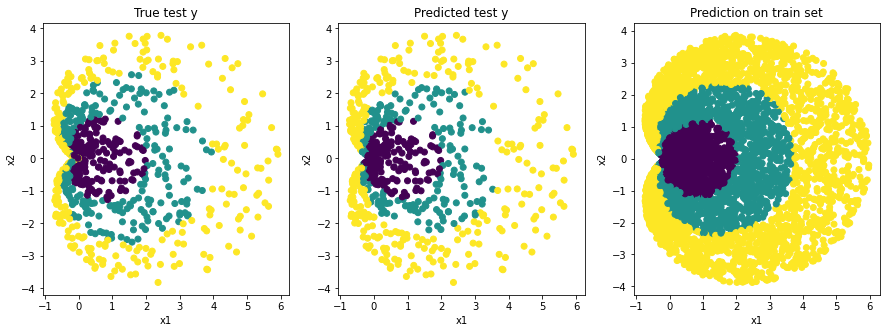

Epoch:  2400 Accuracy:  75.0 %


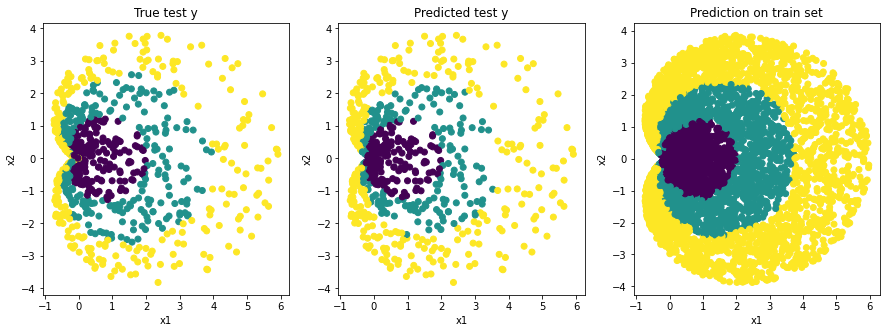

Epoch:  2600 Accuracy:  75.3 %


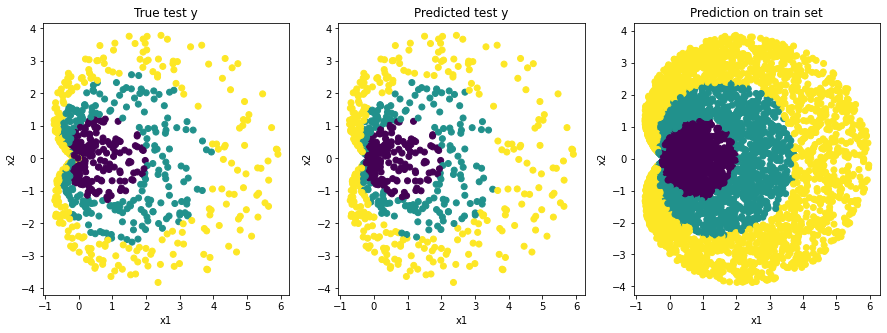

Epoch:  2800 Accuracy:  75.9 %


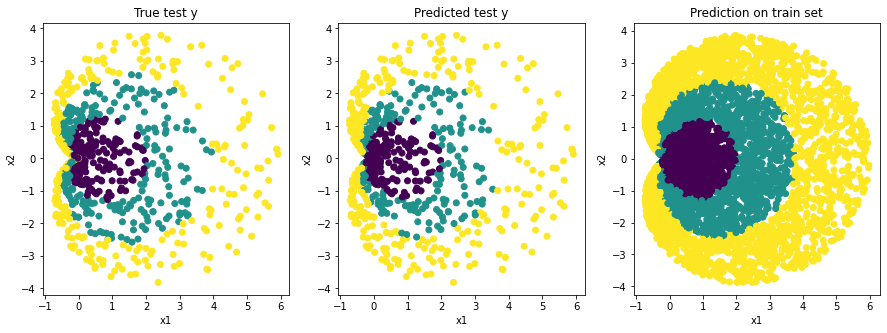

Epoch:  3000 Accuracy:  75.8 %


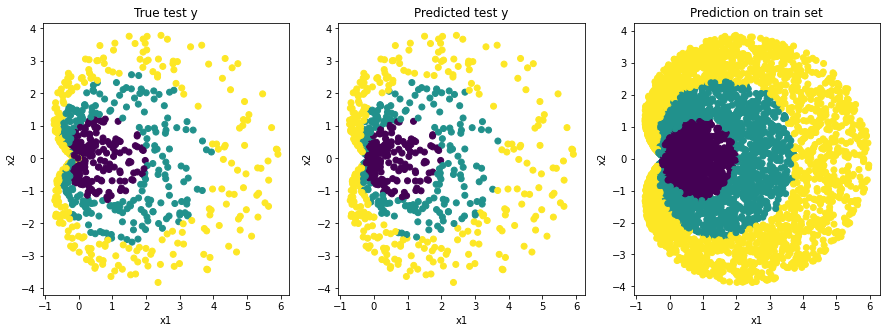

Epoch:  3200 Accuracy:  76.4 %


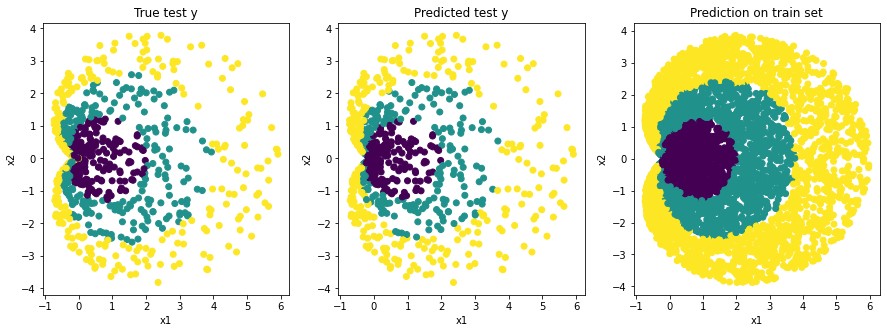

Epoch:  3400 Accuracy:  76.8 %


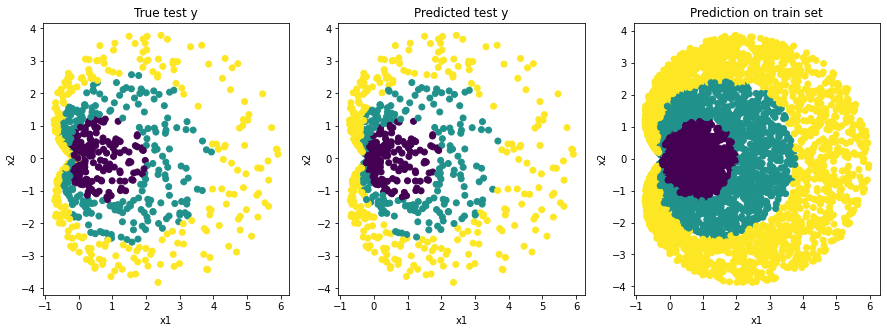

Epoch:  3600 Accuracy:  76.6 %


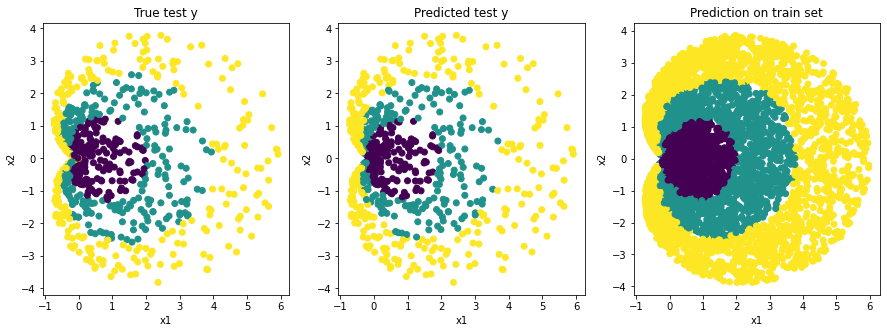

Epoch:  3800 Accuracy:  76.7 %


In [ ]:
cls_loss = nn.CrossEntropyLoss()

import torch.optim as optim
from sklearn.metrics import accuracy_score

#model = LinearModel()
# print(model.linear.weight)
# print(model.linear.bias)

model = MLPModel()
print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))

lr = 0.005
optimizer = optim.SGD(model.parameters(), lr=lr)

list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []


epoch = 4000 
for i in range(epoch):
    model.train()
    optimizer.zero_grad() 
    
    input_x = torch.Tensor(train_X)
    true_y = torch.Tensor(train_y).long()
    pred_y = model(input_x)
    #print(input_x.shape, true_y.shape, pred_y.shape) # 각 인풋과 아웃풋의 차원을 체크해봅니다.
    
    loss = cls_loss(pred_y.squeeze(), true_y)
    loss.backward() 
    optimizer.step() 
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy())
    
    
    model.eval()
    optimizer.zero_grad()
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)   
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    if i % 200 == 0:
        
        model.eval()
        optimizer.zero_grad()
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        acc = accuracy_score(true_y, pred_y)
        list_acc.append(acc)
        list_acc_epoch.append(i)

        fig = plt.figure(figsize=(15,5))
        
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')
        
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Prediction on train set')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

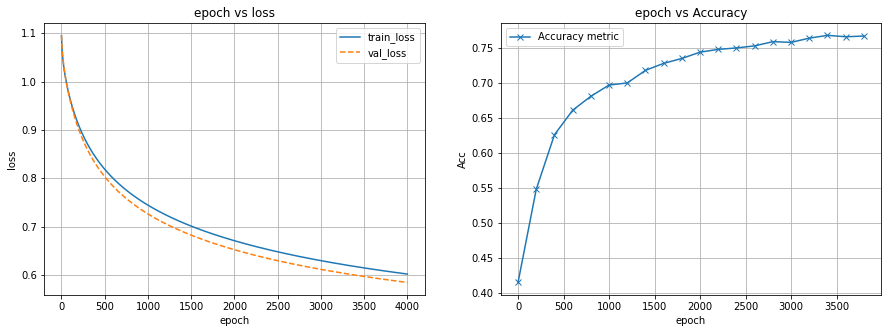

In [ ]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric')
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()